# Predicting Air Quality with Neural Networks

Air Pollution is the most harmful pollution of all. It is a threat to human health and our environment. Understanding and predicting air quality is crucial to protecting the public's well-being and saving the environment. By using advanced technologies, we can better understand how pollution affects us and our planet, and take steps to keep the air clean. In this project, we will see how we can predict air quality using a neural network.

## How Neural Networks are relevant in Environmental Science?

Nowadays, scientists are using a special computer program called neural networks to solve complex problems. These programs are really helpful in understanding complex problems and giving better solutions easily for the problems we had talked about earlier.

* **Pattern Recognition:** These neural networks are good at recognizing the patterns in the dataset which is helpful when we want a good quality prediction model.

* **Adaptability:** These neural networks are like brains, they can learn very fast and adjust to new things easily. We will gather the required data first and then we write the program and check how finely the program works.

### Implementation of Predicting Air Quality with Neural Networks

We will now see how we can predict air quality with neural network using the following steps:

### Step 1: Loading Air Quality Dataset

To build an Air Quality Predictor we need a dataset that has features like PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, etc., Hence we will be using the **Air Quality Data in India (2015 - 2020) dataset**.

In [1]:
import pandas as pd

data = pd.read_csv("city_day.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Step 2: Data Preprocessing

Data Preprocessing is the most important step in any Deep Learning project. One of the most important steps in it is to make sure that the values in the data are present. Here's how to check if we have any null values in every column.

In [2]:
# Checking for missing values
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

As we can see, there are some missing values in our dataset, to fix this we can delete the rows which are having missing values.

Here's how to do it:

In [3]:
data.dropna(axis=0, inplace=True)

### Step 3: Exploratory Data Analysis

Exploratory Data Analysis is the next most important step in deep learning workflow, as it enables us to identify outliers or anomalies within the dataset. By looking at how data is spread out and finding any unusual things, we can make sure that our predictions are strong and trustworthy. Now, let's look at the data to see how it is spread out and what patterns we can find

####  Converting 'Date' column to datetime format

In [4]:
import plotly.express as px

# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#### AQI Trend Over Time

In [5]:
# AQI Trend Over Time
fig1 = px.line(data, x='Date', y='AQI', color='City', title='AQI Trend Over Time')
fig1.show()

#### AQI Distribution by City

In [6]:
# AQI Distribution by City
fig2 = px.box(data, x='City', y='AQI', title='AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

#### Scatter Plot Matrix for selected features

In [7]:
# Scatter Plot Matrix for selected features
selected_features = ['PM2.5', 'NO2', 'CO', 'O3', 'AQI']
fig3 = px.scatter_matrix(data[selected_features], title='Scatter Plot Matrix')
fig3.show()

### Step 4: Splitting Dataset and Standardize the Features

We have imported TensorFlow and necessary libraries, then define feature columns and split the dataset into features (X) and target (y).

The next step is to standardize the features using StandardScaler. Then we split the data into training and testing sets using train_test_split and fit the scaler on the training data and transform both training and testing data.

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

d:\mini projects\projects\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning:

In the future `np.object` will be defined as the corresponding NumPy scalar.



In [9]:

feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
# Splitting the dataset into features (X) and target (y)
X = data[feature_columns]
y = data['AQI']


In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 5: Building the Neural Network Model

In this section, we will design the architecture of the neural network. We will use a model that has layers stacked on top of each other, with each layer having many neurons. We will use ReLU as an activation function for the hidden layers. The output layer will have a single neuron, as we are predicting only one continuous value.

Now let's define the architecture of the model. We will use a Sequential model from tensorflow with dense layers. Then we will compile the model using Adam optimizer and mean_squared_error as a loss function. Finally, we will train the model using the fit() function.

In [12]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)

d:\mini projects\projects\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 25002.3262 - val_loss: 17622.1230
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8761.6475 - val_loss: 5276.1523
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3939.6028 - val_loss: 3289.2383
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2520.2791 - val_loss: 2097.0713
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1721.3353 - val_loss: 1454.0887
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1328.6281 - val_loss: 1147.2172
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1138.4296 - val_loss: 981.4696
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1033.6427 - val_loss: 912.6902
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 964.8467 - val_loss: 858.7426
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 928.7294 - val_loss: 821.3685
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 894.3997 - 

### Step 6: Model Evaluation

We will now evaluate the model by monitoring the training history and by calculating loss using the evaluate() function.

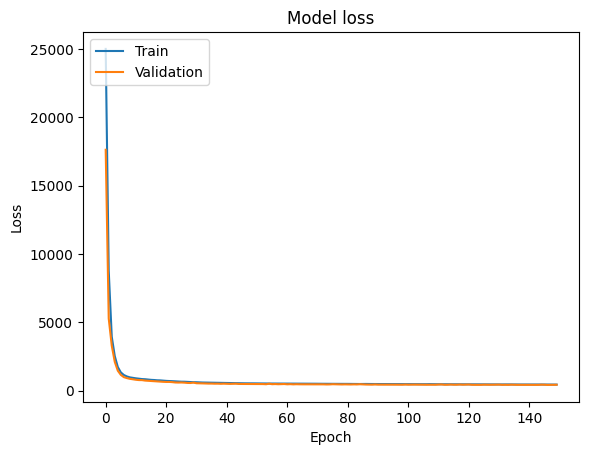

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 452.7544
Mean Squared Error on Test Data: 452.75439453125


In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

### Step 7: Predicting User Input

Now, let's test our model by taking user input and predicting the air quality.

In [14]:
model.save('model.h5')
user_input = pd.DataFrame({
    'PM2.5': [81],
    'PM10': [124],
    'NO': [1.44],
    'NO2': [20],
    'NOx': [12],
    'NH3': [10],
    'CO': [0.1],
    'SO2': [15],
    'O3': [127],
    'Benzene': [0.20],
    'Toluene': [6],
    'Xylene': [0.06]
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted AQI: 194.8220672607422


As we see here, our model is predicting the quality of air almost correctly.

### Conclusion

In this notebook, we have discussed the importance of predicting the Air Quality Index. We have discussed the parameters which affect our air quality. Then we discussed the dataset we used and started building our air quality predictor model. First, we preprocessed our dataset and then did exploratory data analysis to understand more about the dataset. Finally, we designed our model's architecture, compiled it, and trained our model with our preprocessed dataset. Then we looked into how to predict the AQI using user input.